# AI Quest Assignment-04


In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Task 01:
## Your objective is to manually compute the slope (M) and y-intercept (C) using
## Ordinary Least Squares Linear Regression. Once determined, apply these values to
## predict the price when the vegetable weight is 6.

In [3]:
#Create Dataset from given outline

data = {
    'weight': [2,4,5,3,6,5,7],
    'price': [35,60,20,50,50,55,60]
}

#Make dataframe for the dataset
df = pd.DataFrame(data)
df

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [4]:
# Convert dataset into CSV format
dataset = df.to_csv('Dataset.csv', index=False)

In [5]:
# Read dataset
df = pd.read_csv('Dataset.csv')
df.head()

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [6]:
# Check the correlation between weight and price
df.corr()

,weight,price
weight,1.000000,0.306795
price,0.306795,1.000000


Text(0.5, 1.0, 'Weight and price between two elements')

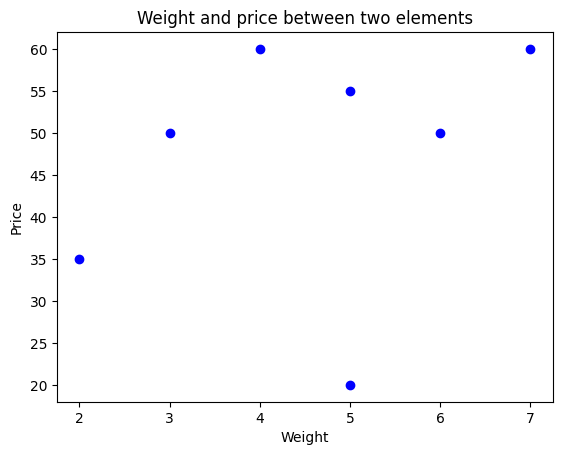

In [10]:
plt.scatter(df['weight'], df['price'], color='blue')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight and price between two elements')

In [11]:
# describe the data with various parameter
df.describe()

,weight,price
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


# Calculate the slope,m and intercept,c

In [13]:
# define the weight as 'x' and price as 'y'
x = df['weight']
y =df['price']

In [14]:
# calculate the mean of weight and price
mean_of_x = np.mean(x)
mean_of_y = np.mean(y)

In [15]:
mean_of_x

4.571428571428571

In [16]:
mean_of_y

47.142857142857146

In [17]:
diff_of_x = x - mean_of_x
diff_of_y = y - mean_of_y

In [19]:
#calculate the slope
slope = np.sum(diff_of_x * diff_of_y) / np.sum(diff_of_x**2)
slope

2.620967741935484

In [20]:
# calculate the intercept
intercept = mean_of_y - (slope * mean_of_x)
intercept

35.16129032258065

In [21]:
# Now predict the price where product weight is 6
(slope * 6) + intercept

50.88709677419355

# Task - 2 Compute the residual of each data point

In [25]:
# fit the dataset in linear regression model
from sklearn.linear_model import LinearRegression
x = df[['weight']]
model = LinearRegression().fit(x,y)

In [27]:
# predict the all prices of each weight
df['y_cap'] = model.predict(x)
df['y_cap']

0    40.403226
1    45.645161
2    48.266129
3    43.024194
4    50.887097
5    48.266129
6    53.508065
Name: y_cap, dtype: float64

In [28]:
df.head()

,weight,price,y_cap
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


In [29]:
# calculate the residual / error of each predicted value
df['residual'] = df['price'] - df['y_cap']
df.head()

,weight,price,y_cap,residual
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097


In [30]:
# Show the residuals
df['residual']

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
Name: residual, dtype: float64

# Task - 3: Calculate both the Mean Squared Error (MSE) and Mean Absolute Error (MAE).

In [35]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error as mae
mae_error = mae(df['price'], df['y_cap'])
mae_error

9.87327188940092

In [36]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error as mse
mse_error = mse(df['price'], df['y_cap'])
mse_error

167.30990783410135